
Support Vector Machine (SVM) Accuracy: 0.9269
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       229
           1       1.00      0.39      0.56        31

    accuracy                           0.93       260
   macro avg       0.96      0.69      0.76       260
weighted avg       0.93      0.93      0.91       260



<Figure size 1000x800 with 0 Axes>

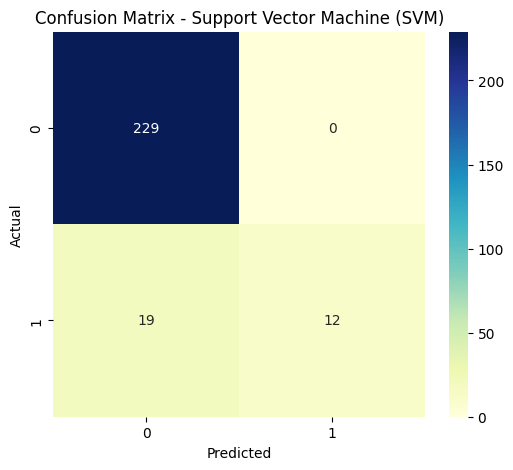


K-Nearest Neighbors (KNN) Accuracy: 0.9308
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       229
           1       0.74      0.65      0.69        31

    accuracy                           0.93       260
   macro avg       0.85      0.81      0.83       260
weighted avg       0.93      0.93      0.93       260



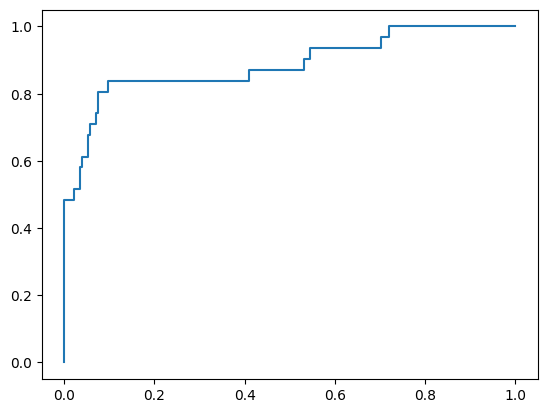

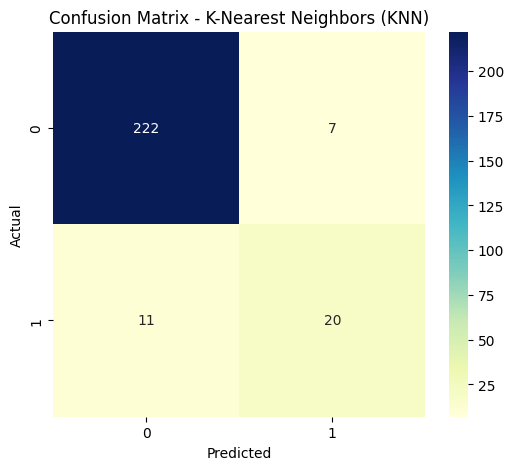


Logistic Regression Accuracy: 0.8885
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       229
           1       0.55      0.35      0.43        31

    accuracy                           0.89       260
   macro avg       0.73      0.66      0.68       260
weighted avg       0.87      0.89      0.88       260



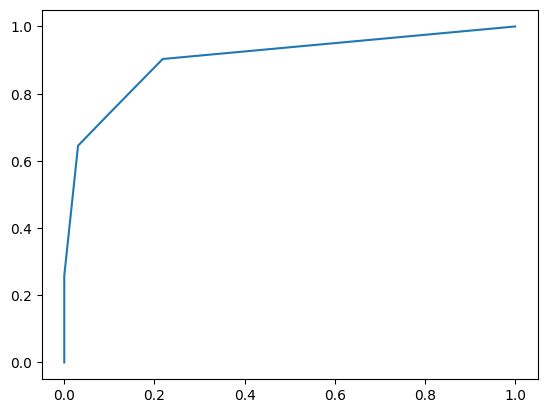

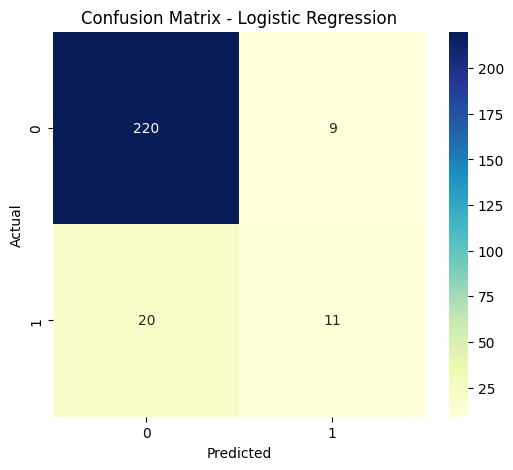


Decision Tree Accuracy: 0.9385
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       229
           1       0.78      0.68      0.72        31

    accuracy                           0.94       260
   macro avg       0.87      0.83      0.84       260
weighted avg       0.94      0.94      0.94       260



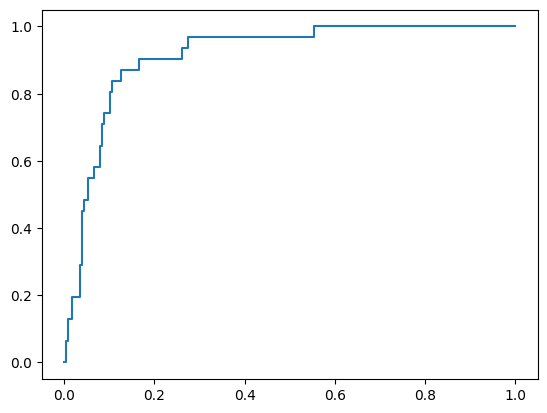

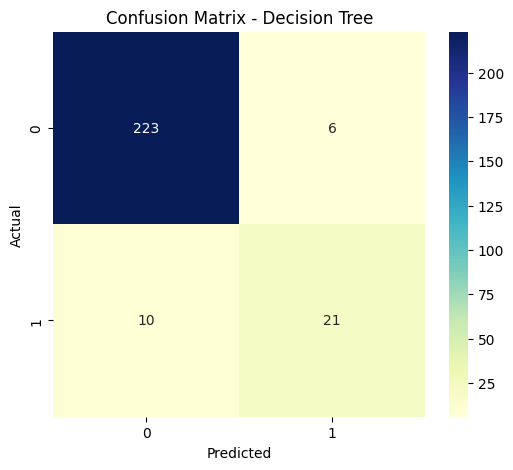


Random Forest Accuracy: 0.9615
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       229
           1       0.96      0.71      0.81        31

    accuracy                           0.96       260
   macro avg       0.96      0.85      0.90       260
weighted avg       0.96      0.96      0.96       260



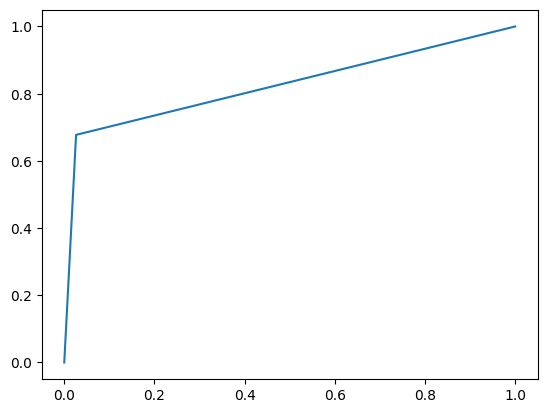

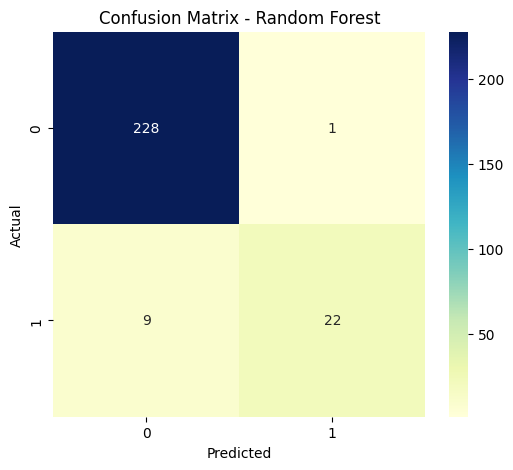


Gradient Boosting Accuracy: 0.9385
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       229
           1       0.83      0.61      0.70        31

    accuracy                           0.94       260
   macro avg       0.89      0.80      0.83       260
weighted avg       0.93      0.94      0.93       260



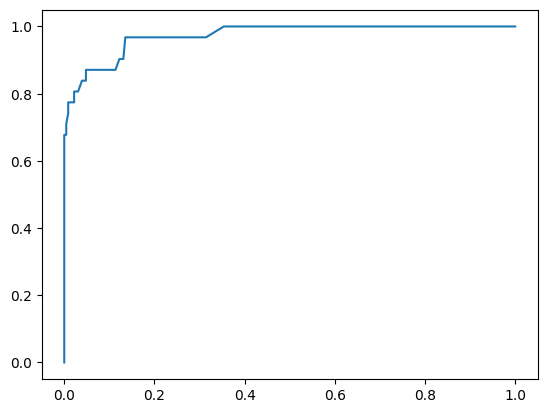

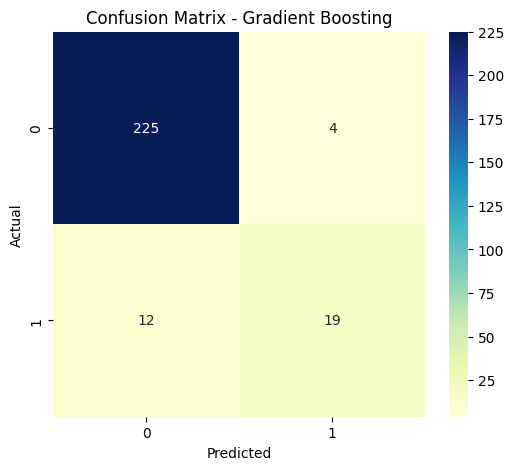

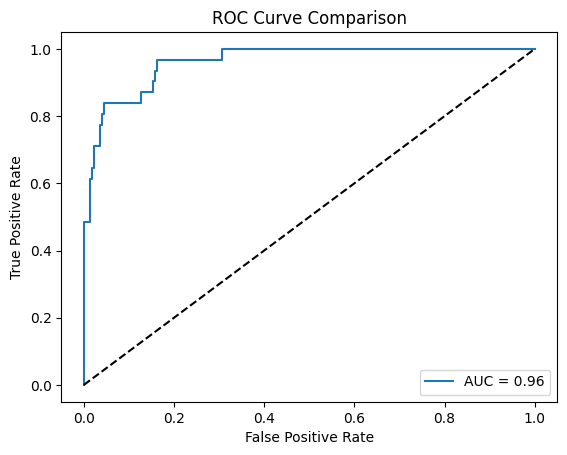


Comparison Table of Classifier Accuracies:
                              Accuracy
Support Vector Machine (SVM)  0.926923
K-Nearest Neighbors (KNN)     0.930769
Logistic Regression           0.888462
Decision Tree                 0.938462
Random Forest                 0.961538
Gradient Boosting             0.938462

Detailed Metrics (Weighted Avg) Table:
                              precision    recall  f1-score  support
Support Vector Machine (SVM)   0.932522  0.926923  0.912234    260.0
K-Nearest Neighbors (KNN)      0.927507  0.930769  0.928682    260.0
Logistic Regression            0.872949  0.888462  0.877741    260.0
Decision Tree                  0.935703  0.938462  0.936606    260.0
Random Forest                  0.961369  0.961538  0.959020    260.0
Gradient Boosting              0.934668  0.938462  0.934431    260.0


<ipython-input-4-7c0a6c67f986>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['quality'], palette='coolwarm')


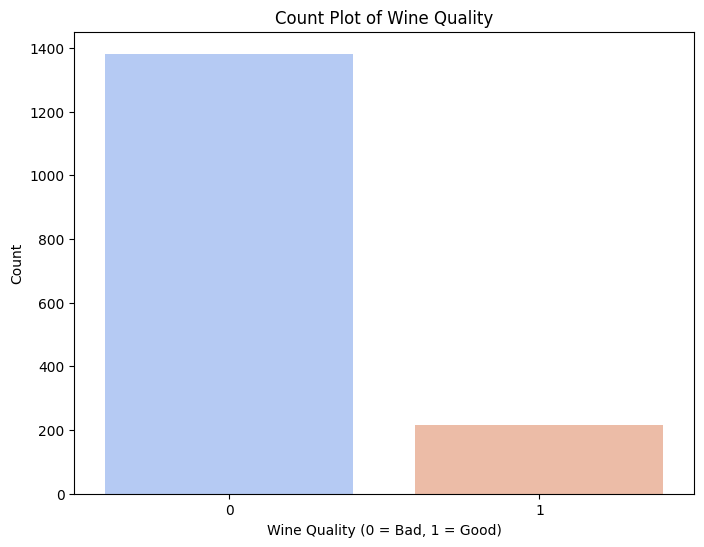

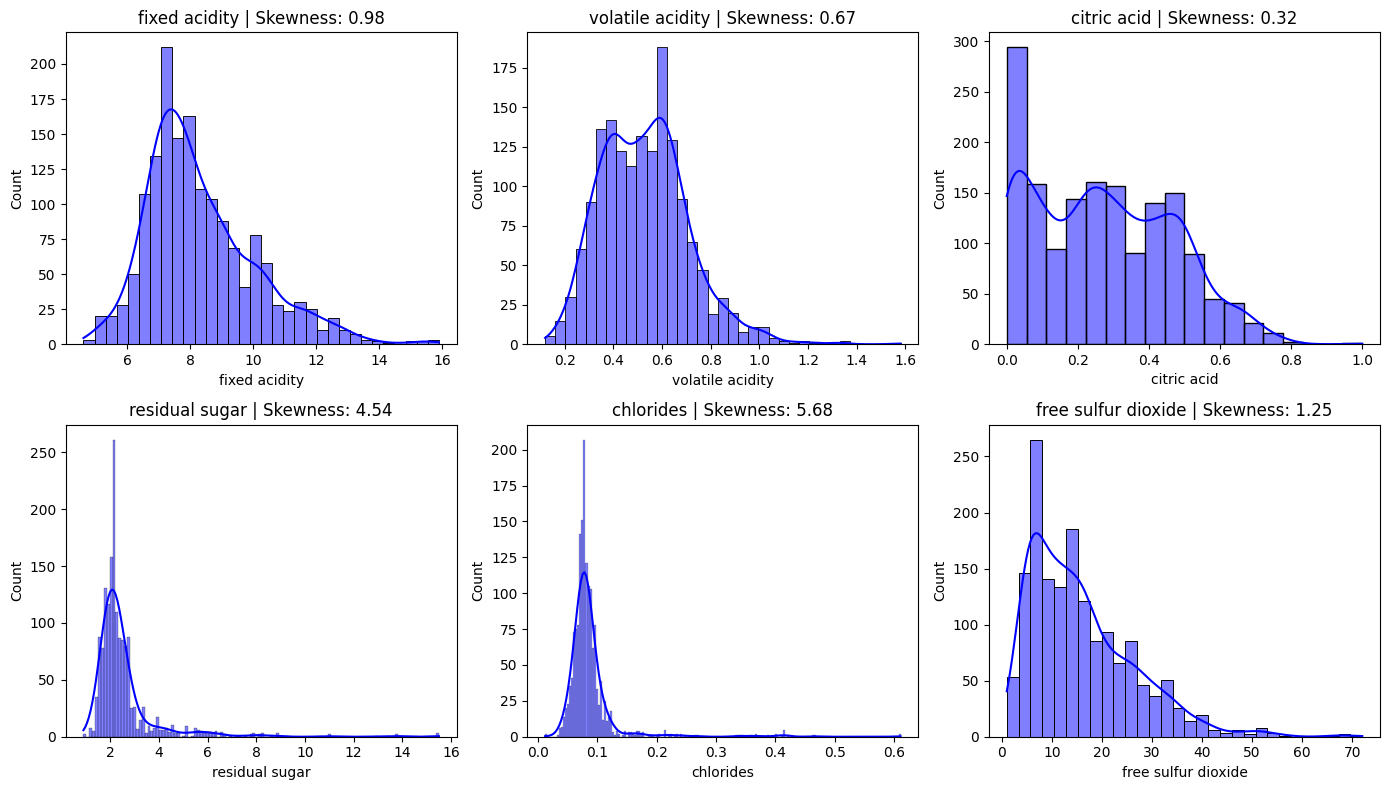

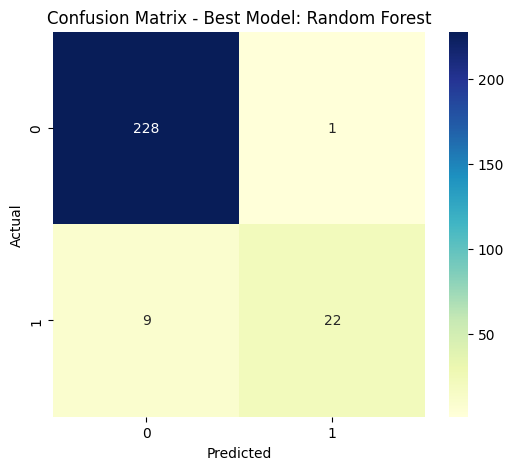

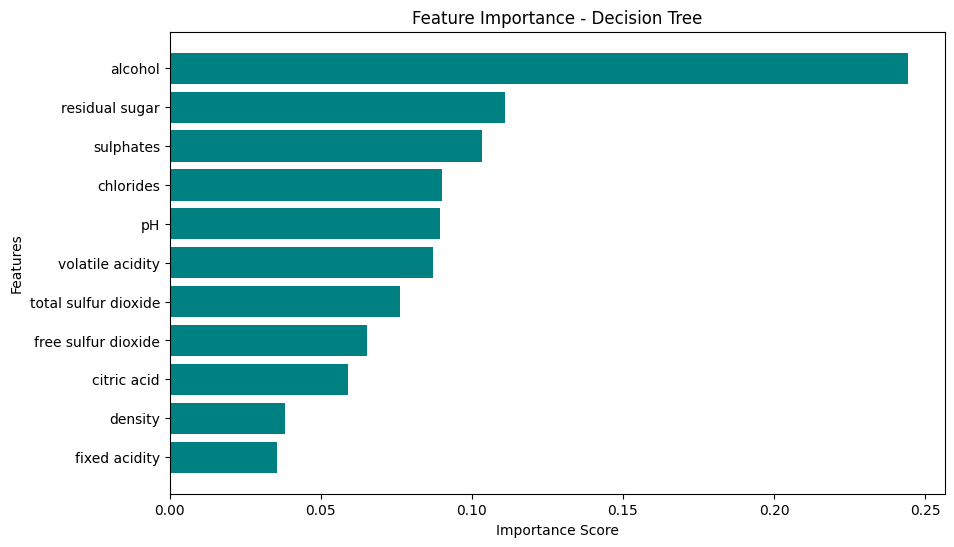

In [4]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load dataset
file_path = "winequality-red.csv"
df = pd.read_csv(file_path)

# Convert quality to binary classification (1: Good (>=7), 0: Bad (<7))
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Splitting data into features and target
X = df.drop(columns=['quality'])
y = df['quality']

# Generate synthetic data by resampling with small variations
def generate_synthetic_data(X, y, num_samples=1000):
    synthetic_X = resample(X, replace=True, n_samples=num_samples, random_state=42)
    noise = np.random.normal(0, 0.02, synthetic_X.shape)
    synthetic_X += noise
    synthetic_y = resample(y, replace=True, n_samples=num_samples, random_state=42)
    return synthetic_X, synthetic_y

# Generate and append synthetic data
X_synthetic, y_synthetic = generate_synthetic_data(X, y, num_samples=1000)
X_extended = np.vstack((X, X_synthetic))
y_extended = np.hstack((y, y_synthetic))

# Splitting dataset into training and testing sets (90-10 split)
X_train, X_test, y_train, y_test = train_test_split(X_extended, y_extended, test_size=0.1, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing classifiers (Naive Bayes and LDA removed)
models = {
    "Support Vector Machine (SVM)": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=40),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=40),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=40)
}

# Training and Evaluating Each Classifier
results = {}
detailed_metrics = {}

plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    report = classification_report(y_test, y_pred, output_dict=True)
    detailed_metrics[name] = report['weighted avg']  # or choose 'macro avg' or specific class

    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC Curve without model name in text
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

# Finalize ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# Comparison Table of Classifier Accuracies
comparison_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print("\nComparison Table of Classifier Accuracies:")
print(comparison_df)

# Detailed Precision, Recall, F1-Score Table
detailed_df = pd.DataFrame(detailed_metrics).T[['precision', 'recall', 'f1-score', 'support']]
print("\nDetailed Metrics (Weighted Avg) Table:")
print(detailed_df)

# Plot 1: Quality Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x=df['quality'], palette='coolwarm')
plt.title("Count Plot of Wine Quality")
plt.xlabel("Wine Quality (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.show()

# Plot 2: Feature Distributions
plt.figure(figsize=(14, 8))
numerical_columns = X.columns
for i, feature in enumerate(numerical_columns[:6], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
plt.tight_layout()
plt.show()

# Plot 3: Confusion Matrix for Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Best Model: {best_model_name}")
plt.show()

# Plot 4: Feature Importance for Decision Tree
if "Decision Tree" in models:
    feature_importance = models["Decision Tree"].feature_importances_
    sorted_idx = feature_importance.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='teal')
    plt.title("Feature Importance - Decision Tree")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()